In [ ]:
# Site Map Generator

In [48]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

def make_site_map(
    xlim=(0, 100),
    ylim=(0, 100),
    points=None,
    rectangles=None,
    polygons=None,
    labels=None,
    title="Site Map (Annotated Scatterplot)",
    grid=True,
    grid_spacing=None,
    equal_aspect=True,
    invert_y=False,
    dpi=300,
    outfile_png="site_map.png",
    transparent=True,
    north_arrow=True,
    north_arrow_pos=(0.9, 0.9),
    north_arrow_length=8,
    scale_bar=True,
    scale_bar_pos=(0.1, 0.05),
    scale_bar_length=20,
    scale_bar_units="m",
):
    if points is None: points = []
    if rectangles is None: rectangles = []
    if polygons is None: polygons = []
    if labels is None: labels = {'fontsize': 10, 'offset': (1.5, 1.5)}
    fs = labels.get('fontsize', 10)
    dx, dy = labels.get('offset', (1.5, 1.5))

    fig, ax = plt.subplots(figsize=(8, 6))

    for p in points:
        x, y = p['x'], p['y']
        marker = p.get('marker', 'o')
        size = p.get('size', 50)
        ax.scatter([x], [y], marker=marker, s=size)
        if p.get('label') and p.get('annotate', True):
            ax.annotate(p['label'], (x, y), xytext=(x + dx, y + dy),
                        textcoords='data', fontsize=fs,
                        arrowprops=dict(arrowstyle='-', lw=0.8))

    for r in rectangles:
        xy = r['xy']; width = r['width']; height = r['height']
        lw = r.get('lw', 1.5)
        rect = Rectangle(xy, width, height, fill=False, lw=lw)
        ax.add_patch(rect)
        if r.get('label'):
            rx = xy[0] + width/2.0; ry = xy[1] + height/2.0
            ax.annotate(r['label'], (rx, ry), ha='center', va='center')

    for poly in polygons:
        xy = poly['xy']; lw = poly.get('lw', 1.5)
        closed = poly.get('closed', True)
        poly_patch = Polygon(xy, closed=closed, fill=True, lw=lw)
        ax.add_patch(poly_patch)
        if poly.get('label'):
            cx = sum(pt[0] for pt in xy)/len(xy)
            cy = sum(pt[1] for pt in xy)/len(xy)
            ax.annotate(poly['label'], (cx, cy), ha='center', va='center')

    ax.set_xlim(*xlim); ax.set_ylim(*ylim)
    if equal_aspect: ax.set_aspect('equal', adjustable='box')
    if invert_y: ax.invert_yaxis()
    ax.set_title(title)

    if grid: ax.grid(True, which='both', linestyle='--', linewidth=0.6)
    if grid_spacing is not None and grid_spacing > 0:
        from matplotlib.ticker import MultipleLocator
        ax.xaxis.set_major_locator(MultipleLocator(grid_spacing))
        ax.yaxis.set_major_locator(MultipleLocator(grid_spacing))

    plt.tight_layout()
    #fig.savefig(outfile_png, dpi=dpi, transparent=transparent, bbox_inches='tight')
    plt.show()
    return fig, ax, outfile_png

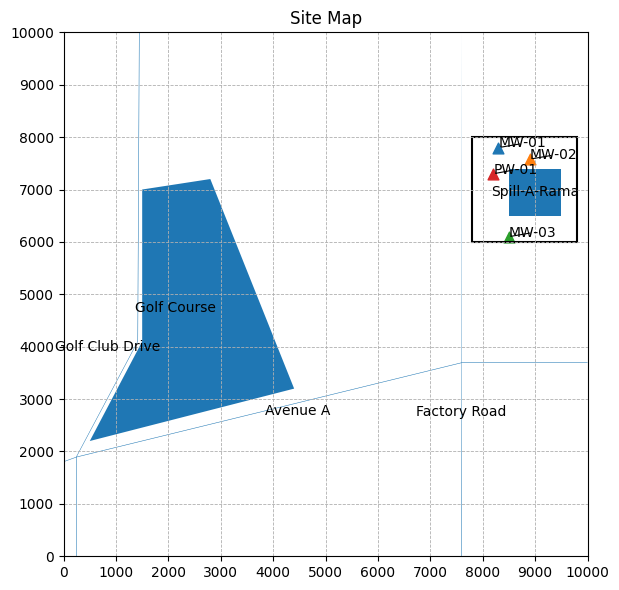

In [63]:
fig, ax, png_path = make_site_map(
    xlim=(0, 10000),
    ylim=(0, 10000),
    points=[
        {'x': 8300, 'y': 7800, 'label': 'MW-01', 'marker': '^', 'size': 60},
        {'x': 8900, 'y': 7580, 'label': 'MW-02', 'marker': '^', 'size': 60},
        {'x': 8500, 'y': 6100, 'label': 'MW-03', 'marker': '^', 'size': 60},
        {'x': 8200, 'y': 7300, 'label': 'PW-01', 'marker': '^', 'size': 60},
    ],
    rectangles=[
        {'xy': (7800, 6000), 'width': 2000, 'height': 2000, 'label': ''},
    ],
    polygons=[
        {'xy': [(500, 2200), (1500, 4100), (1500, 7000), (2800, 7200),(4400, 3200)], 'label': 'Golf Course'},
        {'xy': [(250, 0), (250, 1900), (1420, 4100), (1450, 10000), (1440, 10000), (1410, 4100), (240, 1900), (240, 0)], 'label': 'Golf Club Drive'},
        {'xy': [(0, 1810), (250, 1900), (7600, 3700) ,(10000, 3700) ,(10000, 3690), (7600,3690) , (250, 1890), (0,1800)], 'label': 'Avenue A'},
        {'xy': [(7600, 0), (7600, 10000), (7590, 1000),(7590,0)], 'label': 'Factory Road'},
        {'xy': [(8500, 6500), (8500, 7400), (9500, 7400),(9500,6500)], 'label': 'Spill-A-Rama'},
    ],
    labels={'fontsize': 10, 'offset': (2, 2)},
    title="Site Map",
    grid=True,
    grid_spacing=1000,
    equal_aspect=True,
    invert_y=False,
    dpi=300,
    outfile_png="site_map_homework.png",
    transparent=True,
    north_arrow=True,
    north_arrow_pos=(0.9, 0.9),
    north_arrow_length=8,
    scale_bar=True,
    scale_bar_pos=(0.1, 0.05),
    scale_bar_length=20,
    scale_bar_units="m",
)
